In [1]:
import numpy as np
import pandas as pd
import difflib
import json

import networkx as nx
import warnings
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [2]:
G = nx.read_edgelist('network.csv', data=(('weight', int),('industry',int)) , delimiter=",")

In [3]:
NNODES = G.number_of_nodes()

NEDGES = G.number_of_edges()

LMAX = ((NNODES) * (NNODES - 1)) / 2

print("Number of Nodes: ", NNODES)
print("Number of Edged: ", NEDGES)
print("LMAX: ", LMAX)

Number of Nodes:  14875
Number of Edged:  43932
LMAX:  110625375.0


In [4]:
# Average degree
avg_degree=(2*NEDGES)/NNODES
avg_degree

5.906823529411764

# Sintetic graphs

### Erdos-Renyi (random) graphs

- n (int) – The number of nodes.
- p (float) – Probability for edge creation.

In [5]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(NNODES, p=0.00039 , directed = False, seed = 42) 

In [6]:
er.number_of_edges()

42945

### Watts-Strogatz (small world) graphs

- n (int) – The number of nodes
- k (int) – Each node is joined with its k nearest neighbors in a ring topology.
- p (float) – The probability of rewiring each edge

In [7]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(NNODES, k=6, p=0.1, seed = 42)

In [8]:
ws.number_of_edges()

44625

### Barabasi-Albert (scale-free) graphs

- n (int) – Number of nodes
- m (int) – Number of edges to attach from a new node to existing nodes

In [9]:
# network generators 3 (preferential attachment)
ba = nx.barabasi_albert_graph(NNODES, m=3, seed = 42)

In [10]:
ba.number_of_edges()

44616

### Configuration model

In [11]:
# fitting the degree distribution of the previous BA example
sequence = [i[1] for i in ba.degree()]

cm = nx.configuration_model(sequence)

In [12]:
cm.number_of_edges()

44616

# Degree distribution

In [13]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

### Linkedin network (G)

In [14]:
d=[]
for i in range(len(list(G.degree()))):
    d.append(list(G.degree)[i][1])


(array([1.4429e+04, 2.4900e+02, 8.4000e+01, 3.5000e+01, 1.2000e+01,
        1.9000e+01, 1.3000e+01, 7.0000e+00, 8.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([  1.        ,  26.86666667,  52.73333333,  78.6       ,
        104.46666667, 130.33333333, 156.2       , 182.06666667,
        207.93333333, 233.8       , 259.66666667, 285.53333333,
        311.4       , 337.26666667, 363.13333333, 389.        ,
        414.86666667, 440.73333333, 466.6       , 492.46666667,
        518.33333333, 544.2       , 570.06666667, 595.93333333,
        621.8       , 647.66666667, 673.53333333, 699.4       ,
        725.26666667, 751.13333333, 777.        ]),
 <a list of 30 Patch objects>)

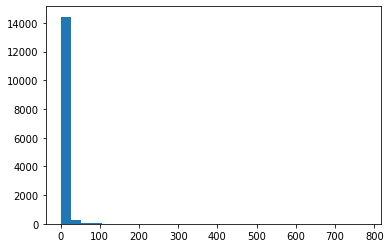

In [15]:
plt.hist(d,bins=30)

{'12': 95, '68': 6, '184': 1, '3': 4185, '6': 362, '49': 5, '1': 3256, '754': 1, '18': 24, '139': 1, '777': 1, '27': 18, '46': 4, '4': 2186, '13': 61, '229': 1, '569': 1, '144': 1, '562': 1, '38': 10, '63': 6, '31': 10, '20': 30, '187': 1, '279': 1, '269': 2, '10': 117, '39': 9, '82': 2, '2': 2399, '7': 303, '138': 1, '48': 7, '16': 48, '497': 1, '55': 7, '226': 1, '391': 1, '60': 2, '58': 4, '9': 166, '98': 2, '365': 1, '26': 27, '165': 1, '25': 24, '23': 22, '227': 1, '156': 1, '486': 1, '33': 16, '435': 1, '100': 1, '5': 459, '141': 2, '21': 36, '272': 1, '65': 4, '87': 4, '181': 1, '81': 1, '153': 1, '44': 8, '125': 1, '73': 4, '43': 11, '8': 224, '243': 1, '37': 8, '14': 77, '163': 1, '155': 1, '242': 1, '145': 2, '220': 2, '317': 1, '40': 10, '157': 1, '407': 1, '101': 2, '30': 17, '146': 1, '298': 1, '149': 1, '22': 30, '190': 1, '78': 3, '164': 1, '24': 27, '45': 5, '36': 10, '67': 1, '89': 1, '64': 5, '56': 5, '80': 2, '17': 62, '11': 102, '15': 70, '103': 1, '128': 1, '50': 7

<BarContainer object of 165 artists>

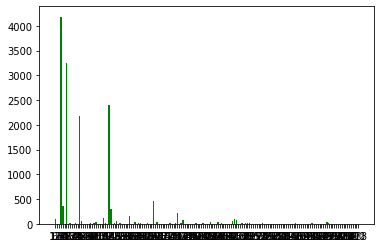

In [16]:
comps = list(G.degree())

myd = {}

for idx, comp in enumerate(comps):
    lunghezza = comp[1]
    
    if str(lunghezza) in myd:
        myd[str(lunghezza)] = myd[str(lunghezza)] + 1
    else:
        myd[str(lunghezza)] = 1
        
print(myd)
plt.bar(myd.keys(), myd.values(), color='g')

Calculating best minimal value for power law fit


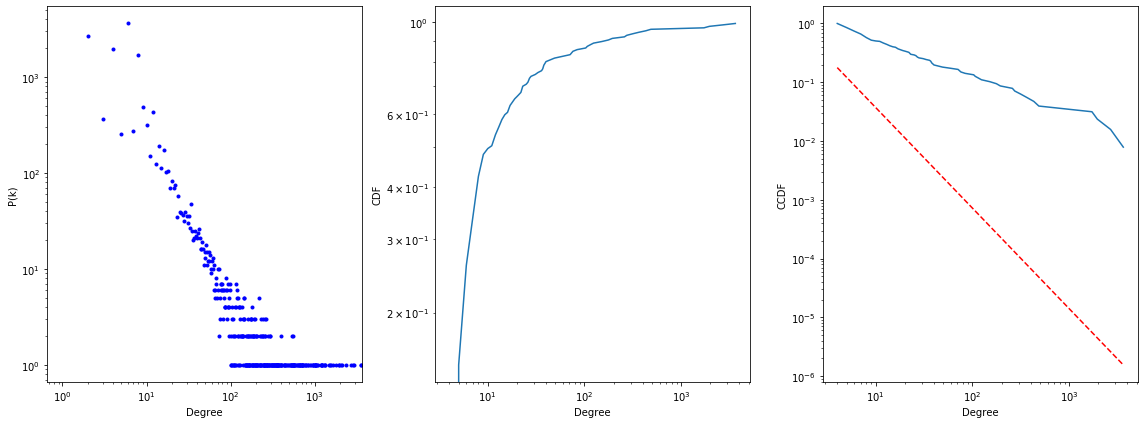

alpha=2.709934259092817 sigma=0.06299647860635171


In [17]:
plot_dist(G)

### Erdos-Renyi (random) (ER)

In [18]:
# nx.draw(er)

Calculating best minimal value for power law fit


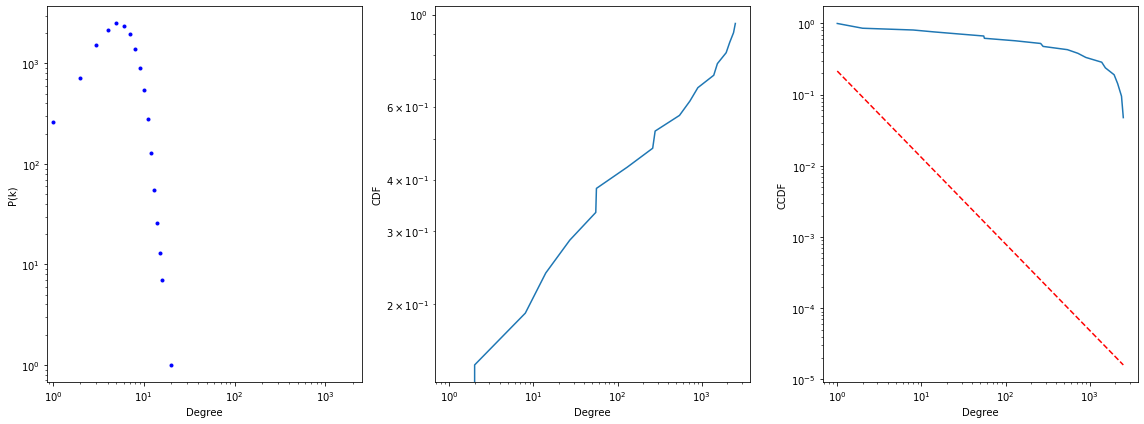

alpha=2.2145053602895044 sigma=0.04680890716668707


In [19]:
plot_dist(er)

### Watts-Strogatz (small world) (WS)

In [20]:
# nx.draw(ws)

Calculating best minimal value for power law fit


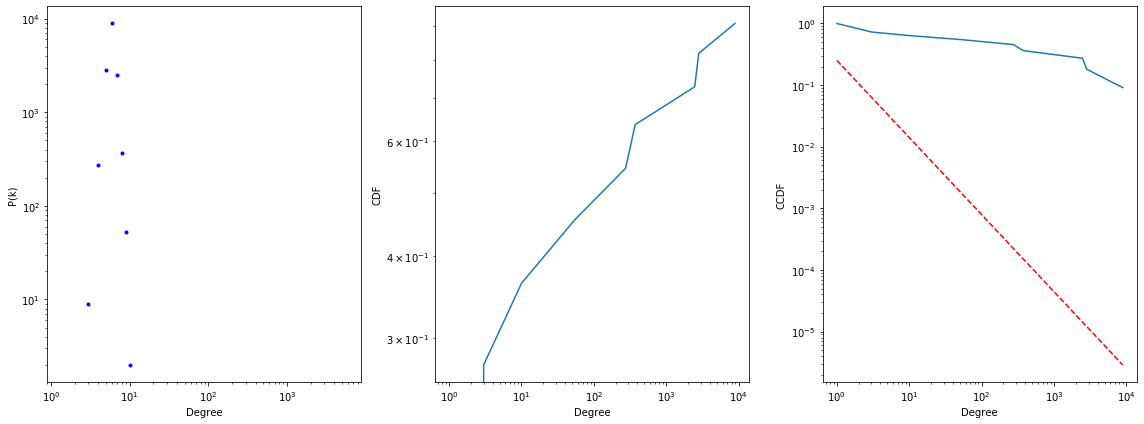

alpha=2.2513226895251064 sigma=0.07577664204161466


In [21]:
plot_dist(ws)

### Barabasi-Albert (scale-free) (BA)

In [22]:
# nx.draw(ba)

Calculating best minimal value for power law fit


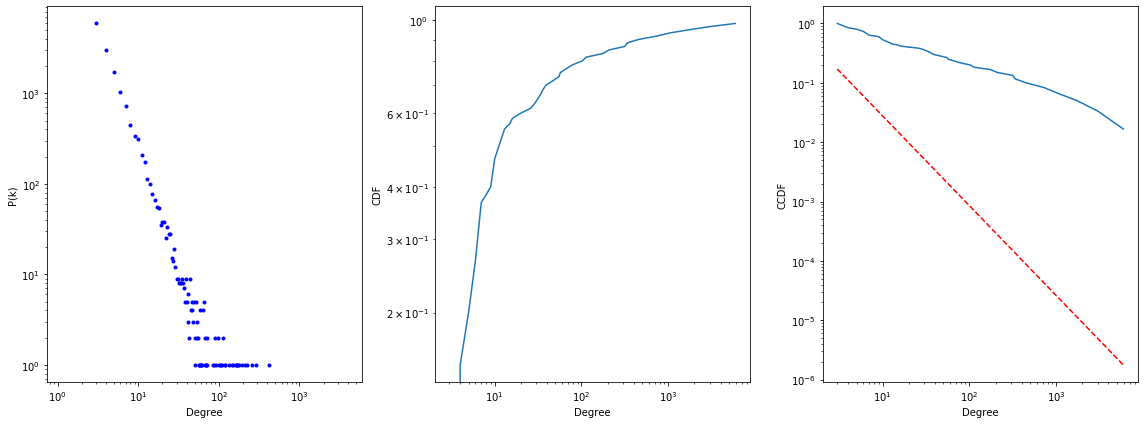

alpha=2.512927068714532 sigma=0.06621859983167905


In [23]:
plot_dist(ba)

### Configuration Model (CM)

In [24]:
# nx.draw(cm)

Calculating best minimal value for power law fit


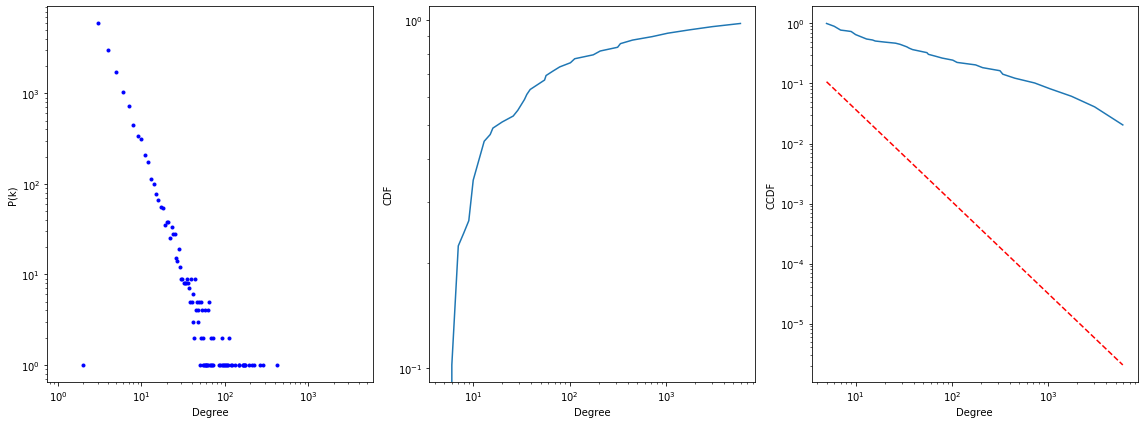

alpha=2.5349817789067988 sigma=0.07642596841525694


In [25]:
plot_dist(cm)

# Connected component analysis

In [26]:
from networkx.drawing.nx_agraph import graphviz_layout

# Plot grafo generico
def plot_graph(G):
    nx.draw(G, with_labels = True)  
    plt.show()

# Plot grafo pesato
def plot_graph_with_weights(G):
    pos = nx.planar_layout(G) # pos = nx.nx_agraph.graphviz_layout(G)
    nx.draw_networkx(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

In [27]:
comps = list(nx.connected_components(G))
print("Number of Connected Components (G): ", len(comps))

Number of Connected Components (G):  717


In [28]:
comps[1]


{'ANIMAPOLIS',
 'CULTURE CLUB COMMUNICATIONS',
 'ESRI',
 'GEOKNOWLEDGE FOUNDATION',
 'GEOSMARTCAMPUS',
 'GRED (GEOMATICS RESEARCH & DEVELOPMENT)'}

In [29]:
comps[2]

{'FLOS', 'FRANKE SPA', 'H.B.S.'}

In [30]:
comps[4]

{'AGS DESIGN',
 'CHINA STATE CONSTRUCTION ENGRG. CORP. LTD - CSCEC',
 'DECORATION CO OF CSCEC',
 'STUDIO CINEL'}

In [31]:
# Grafo di una delle componenti connesse presenti
H = nx.Graph()
H = nx.subgraph(G,comps[0]) 

In [32]:
# Salvo la giant component
import pickle
with open('Comp_conn.pickle', 'wb') as f:
    pickle.dump(H, f)

In [33]:
comps = list(nx.connected_components(er))
print("Number of Connected Components (ER): ", len(comps))

Number of Connected Components (ER):  56


In [34]:
comps = list(nx.connected_components(ws))
print("Number of Connected Components (WS): ", len(comps))

Number of Connected Components (WS):  1


In [35]:
comps = list(nx.connected_components(ba))
print("Number of Connected Components (BA): ", len(comps))

Number of Connected Components (BA):  1


In [36]:
comps = list(nx.connected_components(cm))
print("Number of Connected Components (CM): ", len(comps))

Number of Connected Components (CM):  1


{'12693': 1, '6': 5, '3': 148, '2': 322, '4': 178, '7': 3, '5': 53, '12': 1, '8': 2, '9': 2, '10': 2}


<BarContainer object of 11 artists>

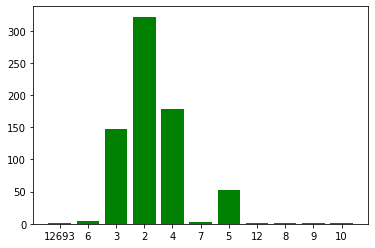

In [37]:
comps = list(nx.connected_components(G))

myd = {}

for idx, comp in enumerate(comps):
    lunghezza = len(comp)
    
    if str(lunghezza) in myd:
        myd[str(lunghezza)] = myd[str(lunghezza)] + 1
    else:
        myd[str(lunghezza)] = 1
        
print(myd)
plt.bar(myd.keys(), myd.values(), color='g')

{'14819': 1, '1': 54, '2': 1}


<BarContainer object of 3 artists>

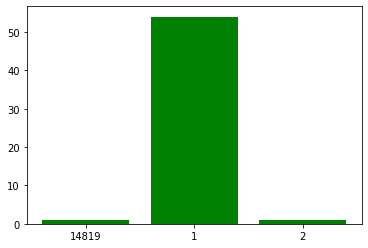

In [38]:
comps = list(nx.connected_components(er))

myd = {}

for idx, comp in enumerate(comps):
    lunghezza = len(comp)
    
    if str(lunghezza) in myd:
        myd[str(lunghezza)] = myd[str(lunghezza)] + 1
    else:
        myd[str(lunghezza)] = 1
        

print(myd)
plt.bar(myd.keys(), myd.values(), color='g')

# Clustering coefficient, Density Analysis

In [39]:
print("Average clustering (G) :", nx.average_clustering(G))
print("Density (G) :", nx.density(G))

Average clustering (G) : 0.597037984278386
Density (G) : 0.00039712407754549986


In [40]:
print("Average clustering (ER) :", nx.average_clustering(er))
print("Density (ER) :", nx.density(er))

Average clustering (ER) : 0.0003334700780078929
Density (ER) : 0.00038820207389127497


In [41]:
print("Average clustering (WS) :", nx.average_clustering(ws))
print("Density (WS) :", nx.density(ws))

Average clustering (WS) : 0.4425117780445636
Density (WS) : 0.0004033884630899556


In [42]:
print("Average clustering (BA) :", nx.average_clustering(ba))
print("Density (BA) :", nx.density(ba))

Average clustering (BA) : 0.003913165465895828
Density (BA) : 0.0004033071074335341


In [43]:
# print("Average clustering (CM) :", nx.average_clustering(cm)) 
# Non si può calcolare l'avarage clustering per il cm perchè è un multigrafo (la funzione restituisce sempre un multigrafo)

print("Density (CM) :", nx.density(cm))

Density (CM) : 0.0004033071074335341


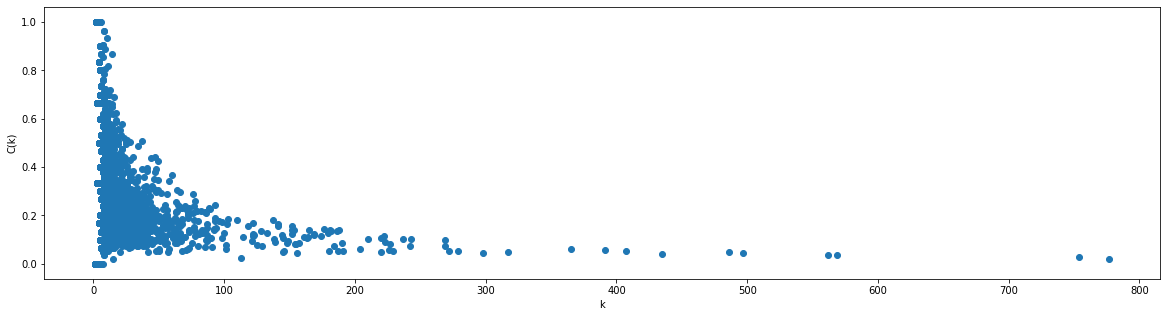

In [44]:
degrees = G.degree()

y = []
x = []

for degree in degrees:
    node = degree[0]
    degree = degree[1]
    local_clustering_coefficient = nx.clustering(G,node)
    
    y.append(local_clustering_coefficient)
    x.append(degree)

    
plt.figure(figsize=(20,5))
plt.scatter(x, y)

plt.xlabel("k")
plt.ylabel("C(k)")

plt.show()

# Assortativity

In [45]:
d=nx.degree_assortativity_coefficient(G)

Text(0, 0.5, 'k_nn(k)')

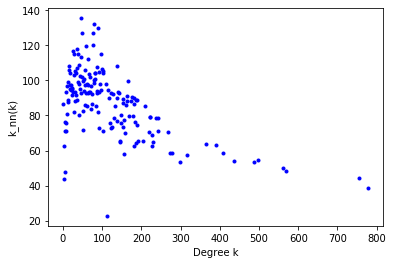

In [46]:
# Calcolo avg nearest neigh
avg=nx.k_nearest_neighbors(G)
y=list(avg.values())

# Calcolo vettore dei gradi
k=G.degree()
x=[]
for item in k:
    x.append(item[1])
    
output = []
for b in x:
       if b not in output:
            output.append(b)

# Plot
plt.plot(output,y,'b.')   
plt.xlabel('Degree k')
plt.ylabel('k_nn(k)')